In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set seaborn style
sns.set() 

# Ejemplo de propagación de incertezas en la división de dos variables aleatorias con distribución de Poisson

Asumimos que tenemos dos variables aletorias $X$ e $Y$ independientes con distribución de Poisson.

Si $\lambda_X$ y $\lambda_Y$ son las constantes de las distribuciones de ambas variables.

Se tiene que $\mu=\lambda$ y $\sigma=\sqrt{\lambda}$ son la esperanza y el desvío estándar para una distribución de Poisson. 

Se define una nueva variable aletaroia como:

\begin{equation}
Z = X / Y
\end{equation}

y se desea encontrar cuánto es el desvío estándar de $Z$, $\sigma_Z$.

Aplicando la fórmula para propagar incertezas se obtiene:

\begin{equation}
\sigma_Z = \mu_Z \sqrt{ 1 / \mu_X + 1 / \mu_Y} 
\end{equation}

## Simulación para verificar el resultado (Monte-Carlo)

El resultado teórico puede ser validado mediante una simulaicón de Monte-Carlo. Se muestrean pares de variables aleatorias independientes con distribución de Poisson, se las divide y se construye el histograma con la distribución de $Z$. De esta manera se obtiene la distribución de probabilidad de la variable $Z$.

En particular, sólo interesa su desvío estándar, pero es importante recalcar que por este método se obtiene la máxima información posible sobre $Z$ (y no sus primeros momentos).

In [2]:
# Función para graficar hisogramas junto con la distribución normal asociada
def plot_histogram_with_gaussian(data, mean, std, range_vals, color, label):
    """
    Plots a histogram of the data and overlays a Gaussian fit.

    Parameters:
        data (np.array): The data to plot.
        mean (float): The mean of the Gaussian fit.
        std (float): The standard deviation of the Gaussian fit.
        range_vals (list): The range for the histogram and Gaussian fit.
        color (str): The color of the histogram.
        label (str): The label for the histogram.
        title (str): The title of the plot.
        ax (matplotlib.axes.Axes): The axis to plot on.
    """
    fig, ax = plt.subplots()

    mu_data, sig_data = np.mean(data), np.std(data)


    # Plot histogram
    range_vals = [int(v) for v in range_vals]
    
    counts, bins, _ = ax.hist(data, bins=range(*range_vals), density=True, align='left',
                              alpha=0.6, color=color, label=label)

    # Plot Gaussian fit
    x = np.linspace(*range_vals, 1000)
    gaussian_fit = norm.pdf(x, mean, std)
    ax.plot(x, gaussian_fit, 'r-', label='Distribución normal')

    # Add title and labels
    title = f'$\hat\mu$ = {mu_data:.2f}      $\hat\sigma$ = {sig_data:.2f}'
    ax.set_title(title)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend(loc='best')   
    return (fig, ax)

In [3]:
# Parámetros para la simulación
lambda_x = 100  # Mean for the first variable
lambda_y = 3  # Mean for the second variable

mu_x = lambda_x
mu_y = lambda_y
sig_x = np.sqrt(mu_x)  # Standard deviation for the first variable
sig_y = np.sqrt(mu_y)  # Standard deviation for the second variable
num_samples = 1000000  # Number of samples to generate     

# Valores teóricos esperados para la variable Z
mu_z_teo = mu_x / mu_y 
std_z_teo = mu_z_teo * np.sqrt((sig_x / mu_x)**2 + (sig_y / mu_y)**2) 

print(f"Esperanza teórica de Z: {mu_z_teo}")
print(f"Desvío estándar de Z: {std_z_teo}")
                                                             

Esperanza teórica de Z: 33.333333333333336
Desvío estándar de Z: 19.531550923607718


In [4]:
# Se simulan las variables con distribución de Poisson
x = np.random.poisson(mu_x, num_samples)
y = np.random.poisson(mu_y, num_samples)

# Se realiza la división
z = x / y

/tmp/ipykernel_2552541/530933604.py:6: RuntimeWarning: divide by zero encountered in divide
  z = x / y


In [5]:
# Se definen límites para los gráficos
lim = 5  # Number of standard deviations to plot
lim_bin_x = [mu_x - lim * sig_x, mu_x + lim * sig_x]  # Range for var1
lim_bin_y = [mu_y - lim * sig_y, mu_y + lim * sig_y]  # Range for var2
lim_bin_z = [mu_z_teo - lim * std_z_teo, mu_z_teo + lim * std_z_teo]  # Range for the division

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 99.98      $\\hat\\sigma$ = 10.00'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

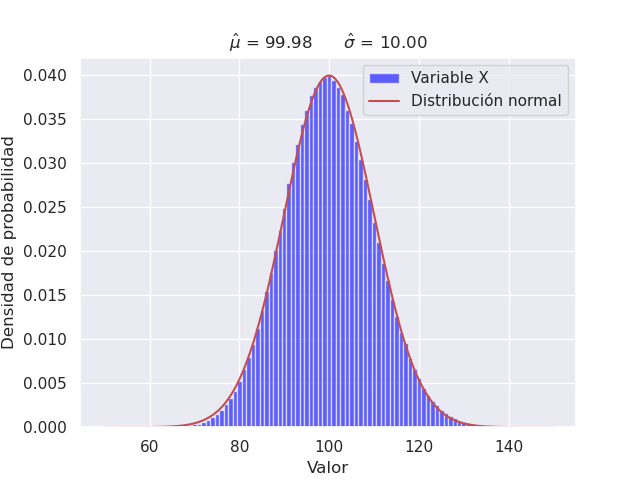

In [6]:
# Calculo el promedio y desvío de los valores simulados para X
mu_x_est, sig_x_est = np.mean(x), np.std(x)

# Plot histograms and Gaussian fits
plot_histogram_with_gaussian(x, mu_x_est, sig_x_est, lim_bin_x, 'blue', 'Variable X')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 3.00      $\\hat\\sigma$ = 1.73'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

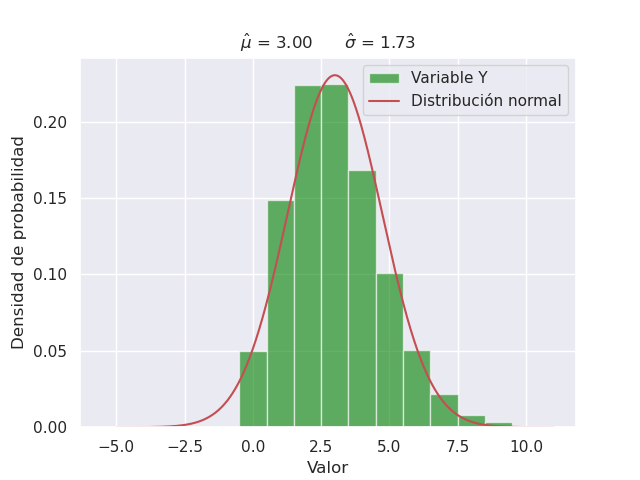

In [7]:
# Calculo el promedio y desvío de los valores simulados para X
mu_y_est, sig_y_est = np.mean(y), np.std(y)

plot_histogram_with_gaussian(y, mu_y_est, sig_y_est, lim_bin_y, 'green', 'Variable Y')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\hat\\mu$ = 43.20      $\\hat\\sigma$ = 27.36'}, xlabel='Valor', ylabel='Densidad de probabilidad'>)

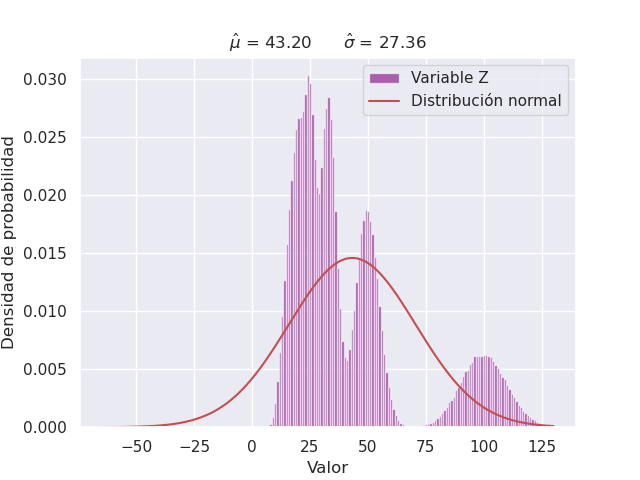

In [8]:
# Quito los valores con Nan
z = z[~np.isnan(z)]
z = z[~np.isinf(z)]
mu_z_est, sig_z_est = np.mean(z), np.std(z)

plot_histogram_with_gaussian(z, mu_z_est, sig_z_est, lim_bin_z, 'purple', 'Variable Z')

La aproximación a primer orden de la fórmula de propagación de incertezas no resulta adecuada para describir el comportamiento de la distribución del cociente de estas dos variables.